#Tables and Graphs

Notebook created with the intention of creating the tables and graphs that will be presented in the paper.

In [12]:
install.packages("ggrepel")
install.packages("png")
library(tidyverse)
library(ggrepel)
library(png)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(grid)

In [ ]:
library(dplyr)

## Plots

Graph function

In [ ]:
grafico <- function(data, title_graph,name_fig){
    data = data %>%
        mutate(GRU = real-GRU.1) %>%
        mutate(LSTM_1 = real-LSTM.1) %>%
        mutate(LSTM_2 = real-LSTM.2) %>%
        mutate(MLP = real-MLP.1) %>%
        mutate(simple_RNN = real-RNN.1) %>%
        mutate(real = real-real) 

    data_2 = subset(data, select = -c(GRU.1,LSTM.1,LSTM.2,MLP.1,RNN.1))
    data_2 = data_2 %>% pivot_longer(cols=-t)
    datostexto = data_2 %>% filter(t == max(t))

    plot_fx <- ggplot(data_2, aes(x = t, y = value, col = name)) +  
    geom_line(linewidth = 0.5) +
    guides(col = "none") + 
    geom_label_repel(data=datostexto, aes(x=t, y=value, col=name, label=name), hjust=-0.9) + 

    labs(x = "time", y = "error", title = title_graph) +
    scale_x_continuous(limits = c(min(data$t),1.25*max(data$t))) +  
    theme_minimal() + 
    theme(text = element_text(size = 20))
    ggsave(name_fig, height = 7 , width = 14 )
    print(plot_fx)
    }


Load data

In [ ]:
datos_prueba_original_t0 = read.csv("t_0.csv")
datos_prueba_original_t1 = read.csv("t_1.csv")
datos_prueba_original_t2 = read.csv("t_2.csv")

### t0

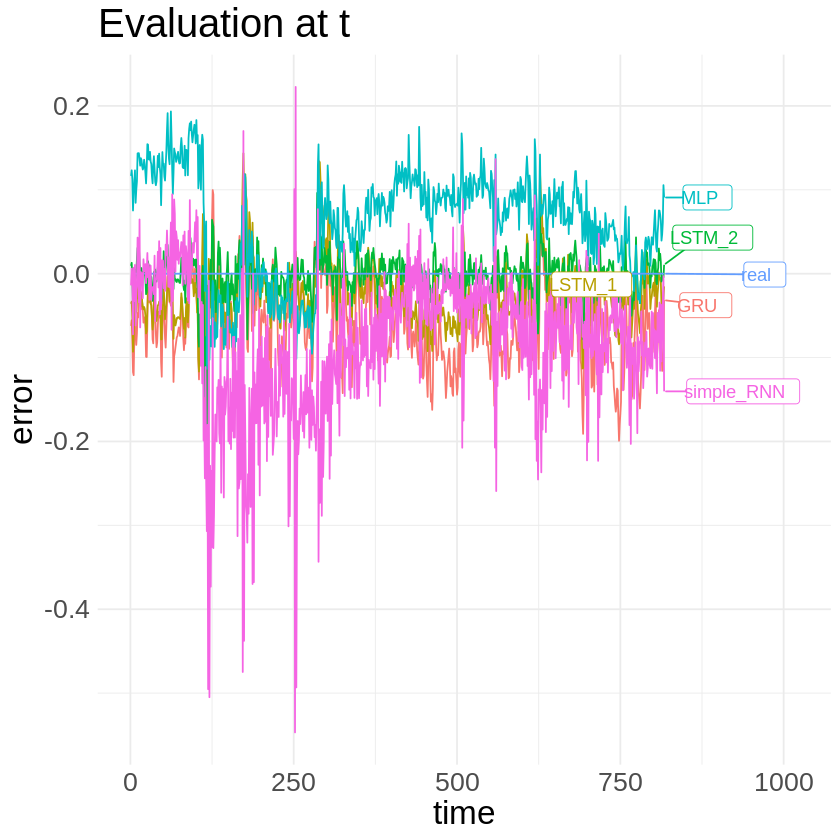

In [ ]:
grafico(datos_prueba_original_t0, "Evaluation at t", "fig_t0.png")

### t1

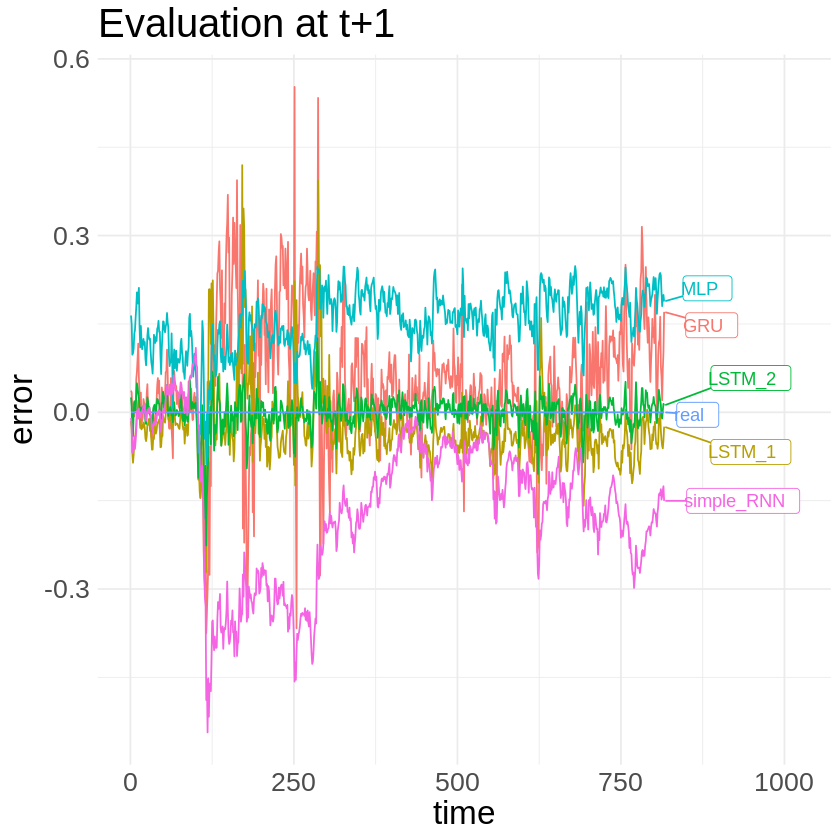

In [ ]:
grafico(datos_prueba_original_t1, "Evaluation at t+1", "fig_t1.png")

### t2

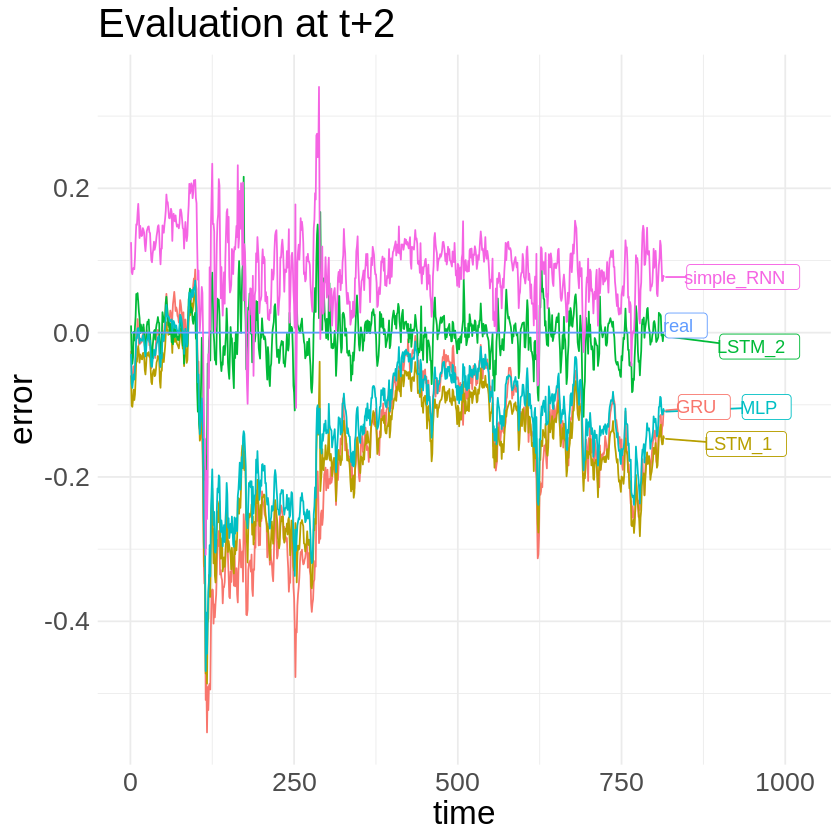

In [ ]:
grafico(datos_prueba_original_t2, "Evaluation at t+2", "fig_t2.png")